In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

2024-07-10 16:19:01.047710: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
keras.backend.backend()

'tensorflow'

In [3]:
fm = keras.datasets.fashion_mnist

In [4]:
(X_train, y_train), (X_test, y_test) = fm.load_data()

4422102/4422102 [==============================] - 4s 1us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

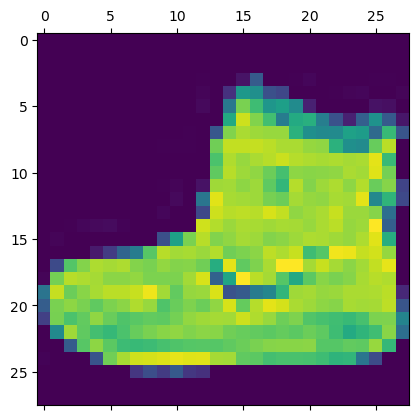

In [8]:
plt.matshow(X_train[0])

# Normalisation/Scaling

In [9]:
X_train = X_train/255
X_test = X_test/255

# Building Model and Adding Layers

In [10]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

# TF Parameters

### 1. Activation functions

-sigmoid
-softmax
-relu
-leaky_relu
-tanh

Link: https://www.tensorflow.org/api_docs/python/tf/keras/activations

### 2. Losses

#### Probalilistic Losses

-Binary Cross-Entropy Loss
-Categorical Crossentropy Loss
-Sparse Categorical Crossentropy Loss
-Poisson Loss
-Kullback-Leibler Divergence Loss

#### Regression Losses

-Mean Squared Error (MSE)
-Mean Absolute Error (MAE)
-Cosine Similarity Loss

Link: https://www.tensorflow.org/api_docs/python/tf/keras/losses

### 3. Optimizers

-Adam
-SGD

Link: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

In [11]:
model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])

In [14]:
model.fit(X_train, y_train)

1875/1875 [==============================] - 3s 1ms/step - loss: 0.5020 - accuracy: 0.8249


# Testing

In [15]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 813us/step - loss: 0.4258 - accuracy: 0.8522


[0.42579180002212524, 0.8521999716758728]